In [3]:
%run setup.ipynb

In [4]:
sns.set_style("white")
sns.set_style("ticks")

In [21]:
def plot_signal(
    pop,
    chromosome,
    ax=None,
    markersize=0.5,
    filter_size=20,
    filter_t=2,
    stat=None,
    label=False,
    legend=False,
):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 1), facecolor="w")
        sns.despine(ax=ax, offset=3)

    # load data
    windows, gwindows, h1, h12, h123, h2_h1 = load_h12_gwss(pop, chromosome)
    x = windows.mean(axis=1) / 1e6

    # filter
    if filter_size:
        h1 = hampel_filter(h1, size=filter_size, t=filter_t)
        h12 = hampel_filter(h12, size=filter_size, t=filter_t)
        h123 = hampel_filter(h123, size=filter_size, t=filter_t)

    # plot data
    if stat is None:
        palette = sns.color_palette("Blues_d", 3)[::-1]
        ax.plot(
            x,
            h123,
            linestyle=" ",
            marker="o",
            color=palette[0],
            markersize=markersize,
            label="H123",
        )
        ax.plot(
            x,
            h12,
            linestyle=" ",
            marker="o",
            color=palette[1],
            markersize=markersize,
            label="H12",
        )
        ax.plot(
            x,
            h1,
            linestyle=" ",
            marker="o",
            color=palette[2],
            markersize=markersize,
            label="H1",
        )
    else:
        y = {"H1": h1, "H12": h12, "H123": h123}[stat]
        color = sns.color_palette()[0]
        ax.plot(
            x,
            y,
            linestyle=" ",
            marker="o",
            color=color,
            markersize=markersize,
            label=stat,
        )

    # tidy plot
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xlim(0, chromosome_plen[chromosome] / 1e6)
    #     ax.set_yticks([0, 1])
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_formatter(FormatStrFormatter("%d"))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.set_ylim(0, 1)

    if label:
        pop_label = pop_defs[pop]["label"]
        annotation = pop_label.replace("An. gambiae", "$An. gambiae$").replace(
            "An. coluzzii", "$An. coluzzii$"
        )
        ax.annotate(
            annotation,
            xy=(0, 1),
            xytext=(2, 0),
            textcoords="offset points",
            fontsize=8,
            va="top",
            ha="left",
        )

    if legend:
        lgnd = ax.legend(
            loc="upper left",
            frameon=False,
            bbox_to_anchor=(1, 1),
            fontsize=8,
            markerscale=10,
            handletextpad=0,
        )

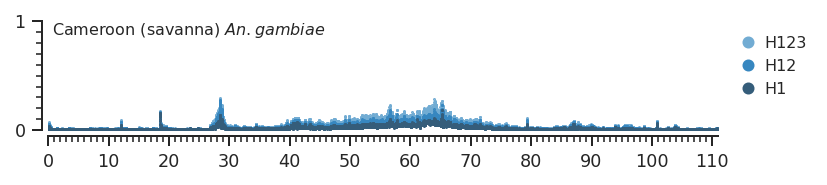

In [22]:
plot_signal("cm_sav_gam", "2", filter_size=None, label=True, legend=True)

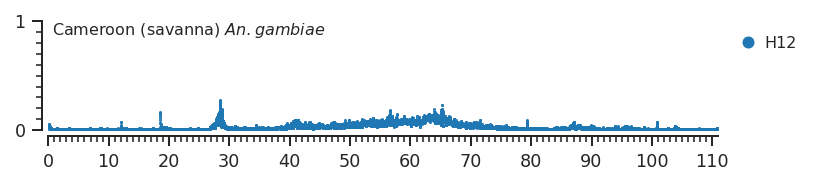

In [34]:
plot_signal("cm_sav_gam", "2", stat='H12', filter_size=None, label=True, legend=True)

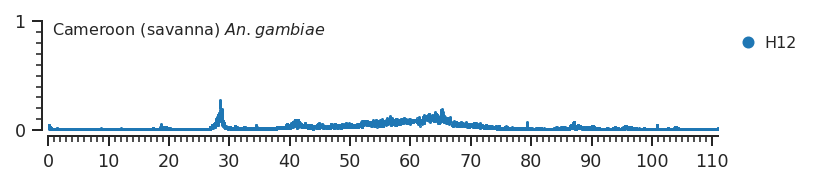

In [35]:
plot_signal("cm_sav_gam", "2", stat='H12', filter_size=20, label=True, legend=True)

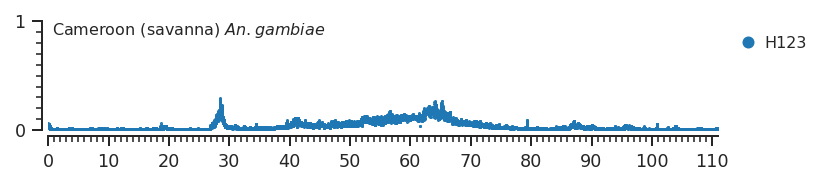

In [36]:
plot_signal("cm_sav_gam", "2", stat='H123', filter_size=20, label=True, legend=True)

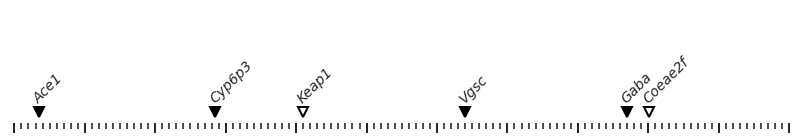

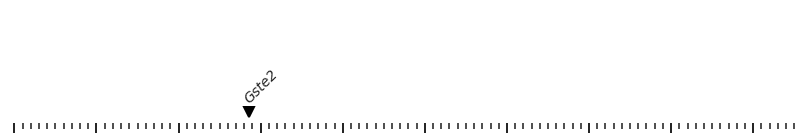

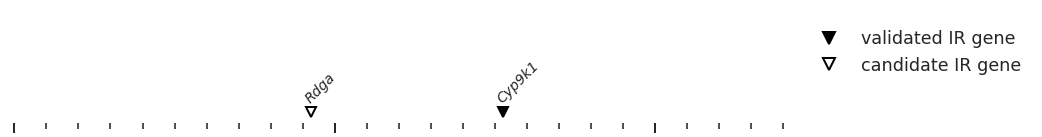

In [23]:
def plot_loci(chromosome, ax=None, legend=False, y=0.1, fontsize=7):
    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 1), facecolor="w")
        sns.despine(left=True, bottom=True)
    #     guide_loci(chromosome, ax=ax, ymax=.3)
    for gene in validated_ir_genes:
        if gene.chromosome == chromosome:
            x = (gene.chromosome_start + gene.chromosome_end) / 2e6
            ax.plot([x], [y], marker="v", linestyle=" ", color="k")
            ax.annotate(
                gene["Name"],
                xy=(x, y),
                xytext=(-4, 3),
                textcoords="offset points",
                fontstyle="italic",
                ha="left",
                va="bottom",
                fontsize=fontsize,
                rotation=45,
            )
    for gene in candidate_ir_genes:
        if gene.chromosome == chromosome:
            x = (gene.chromosome_start + gene.chromosome_end) / 2e6
            ax.plot([x], [y], marker="v", linestyle=" ", color="k", mfc="none")
            ax.annotate(
                gene["Name"],
                xy=(x, y),
                xytext=(-4, 3),
                textcoords="offset points",
                fontstyle="italic",
                ha="left",
                va="bottom",
                fontsize=fontsize,
                rotation=45,
            )
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(0, chromosome_plen[chromosome] / 1e6)
    ax.set_ylim(0, 1)
    ax.set_yticks([])
    if legend:
        from matplotlib.lines import Line2D

        validated_gene_marker = Line2D(
            [],
            [],
            linestyle=" ",
            marker="v",
            color="k",
            label="validated IR gene",
            markersize=6,
        )
        candidate_gene_marker = Line2D(
            [],
            [],
            linestyle=" ",
            marker="v",
            mfc="none",
            mec="k",
            label="candidate IR gene",
            markersize=6,
        )
        ax.legend(
            handles=[validated_gene_marker, candidate_gene_marker],
            bbox_to_anchor=(1, 1),
            loc="upper left",
            facecolor="w",
            edgecolor="w",
        )


plot_loci("2")
plot_loci("3")
plot_loci("X", legend=True)

In [38]:
def fig_h12(
    pops,
    markersize=0.5,
    figw=10,
    loci_figh=0.7,
    pop_figh=1,
    savefig=None,
    savefig_dpi=150,
    stat=None,
    filter_size=None,
):

    figsize = figw, loci_figh + pop_figh * len(pops) + 0.5
    fig = plt.figure(figsize=figsize, facecolor="w")
    width_ratios = [chromosome_plen[c] for c in chromosomes]
    gs = fig.add_gridspec(
        ncols=3,
        nrows=1 + len(pops),
        width_ratios=width_ratios,
        height_ratios=[loci_figh] + [pop_figh] * len(pops),
    )

    # Loci

    ax = fig.add_subplot(gs[0, 0])
    sns.despine(ax=ax, offset=1, left=True)
    plot_loci(chromosome="2", ax=ax)
    ax.set_title("Chromosome 2")

    ax = fig.add_subplot(gs[0, 1])
    sns.despine(ax=ax, offset=1, left=True)
    plot_loci(chromosome="3", ax=ax)
    ax.set_title("Chromosome 3")

    ax = fig.add_subplot(gs[0, 2])
    sns.despine(ax=ax, offset=1, left=True)
    plot_loci(chromosome="X", ax=ax, legend=False)
    ax.set_title("Chromosome X")

    # H12

    for i, pop in enumerate(pops):

        ax = fig.add_subplot(gs[i + 1, 0])
        sns.despine(ax=ax, offset=3)
        plot_signal(
            pop,
            chromosome="2",
            ax=ax,
            markersize=markersize,
            stat=stat,
            label=True,
            filter_size=filter_size,
        )
        if i < len(pops) - 1:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel(f"Position (Mbp)")
        if i == 0 and stat:
            ax.set_ylabel(stat)

        ax = fig.add_subplot(gs[i + 1, 1])
        sns.despine(ax=ax, offset=3, left=True)
        ax.yaxis.set_tick_params(length=0, which="both")
        plot_signal(
            pop,
            chromosome="3",
            ax=ax,
            markersize=markersize,
            stat=stat,
            filter_size=filter_size,
        )
        if i < len(pops) - 1:
            ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(axis="y", length=0)

        ax = fig.add_subplot(gs[i + 1, 2])
        sns.despine(ax=ax, offset=3, left=True)
        ax.yaxis.set_tick_params(length=0, which="both")
        plot_signal(
            pop,
            chromosome="X",
            ax=ax,
            markersize=markersize,
            stat=stat,
            filter_size=filter_size,
            legend=(i == 0 and not stat),
        )
        if i < len(pops) - 1:
            ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(axis="y", length=0)

    fig.tight_layout()
    if savefig:
        fig.savefig(savefig, bbox_inches="tight", dpi=savefig_dpi)

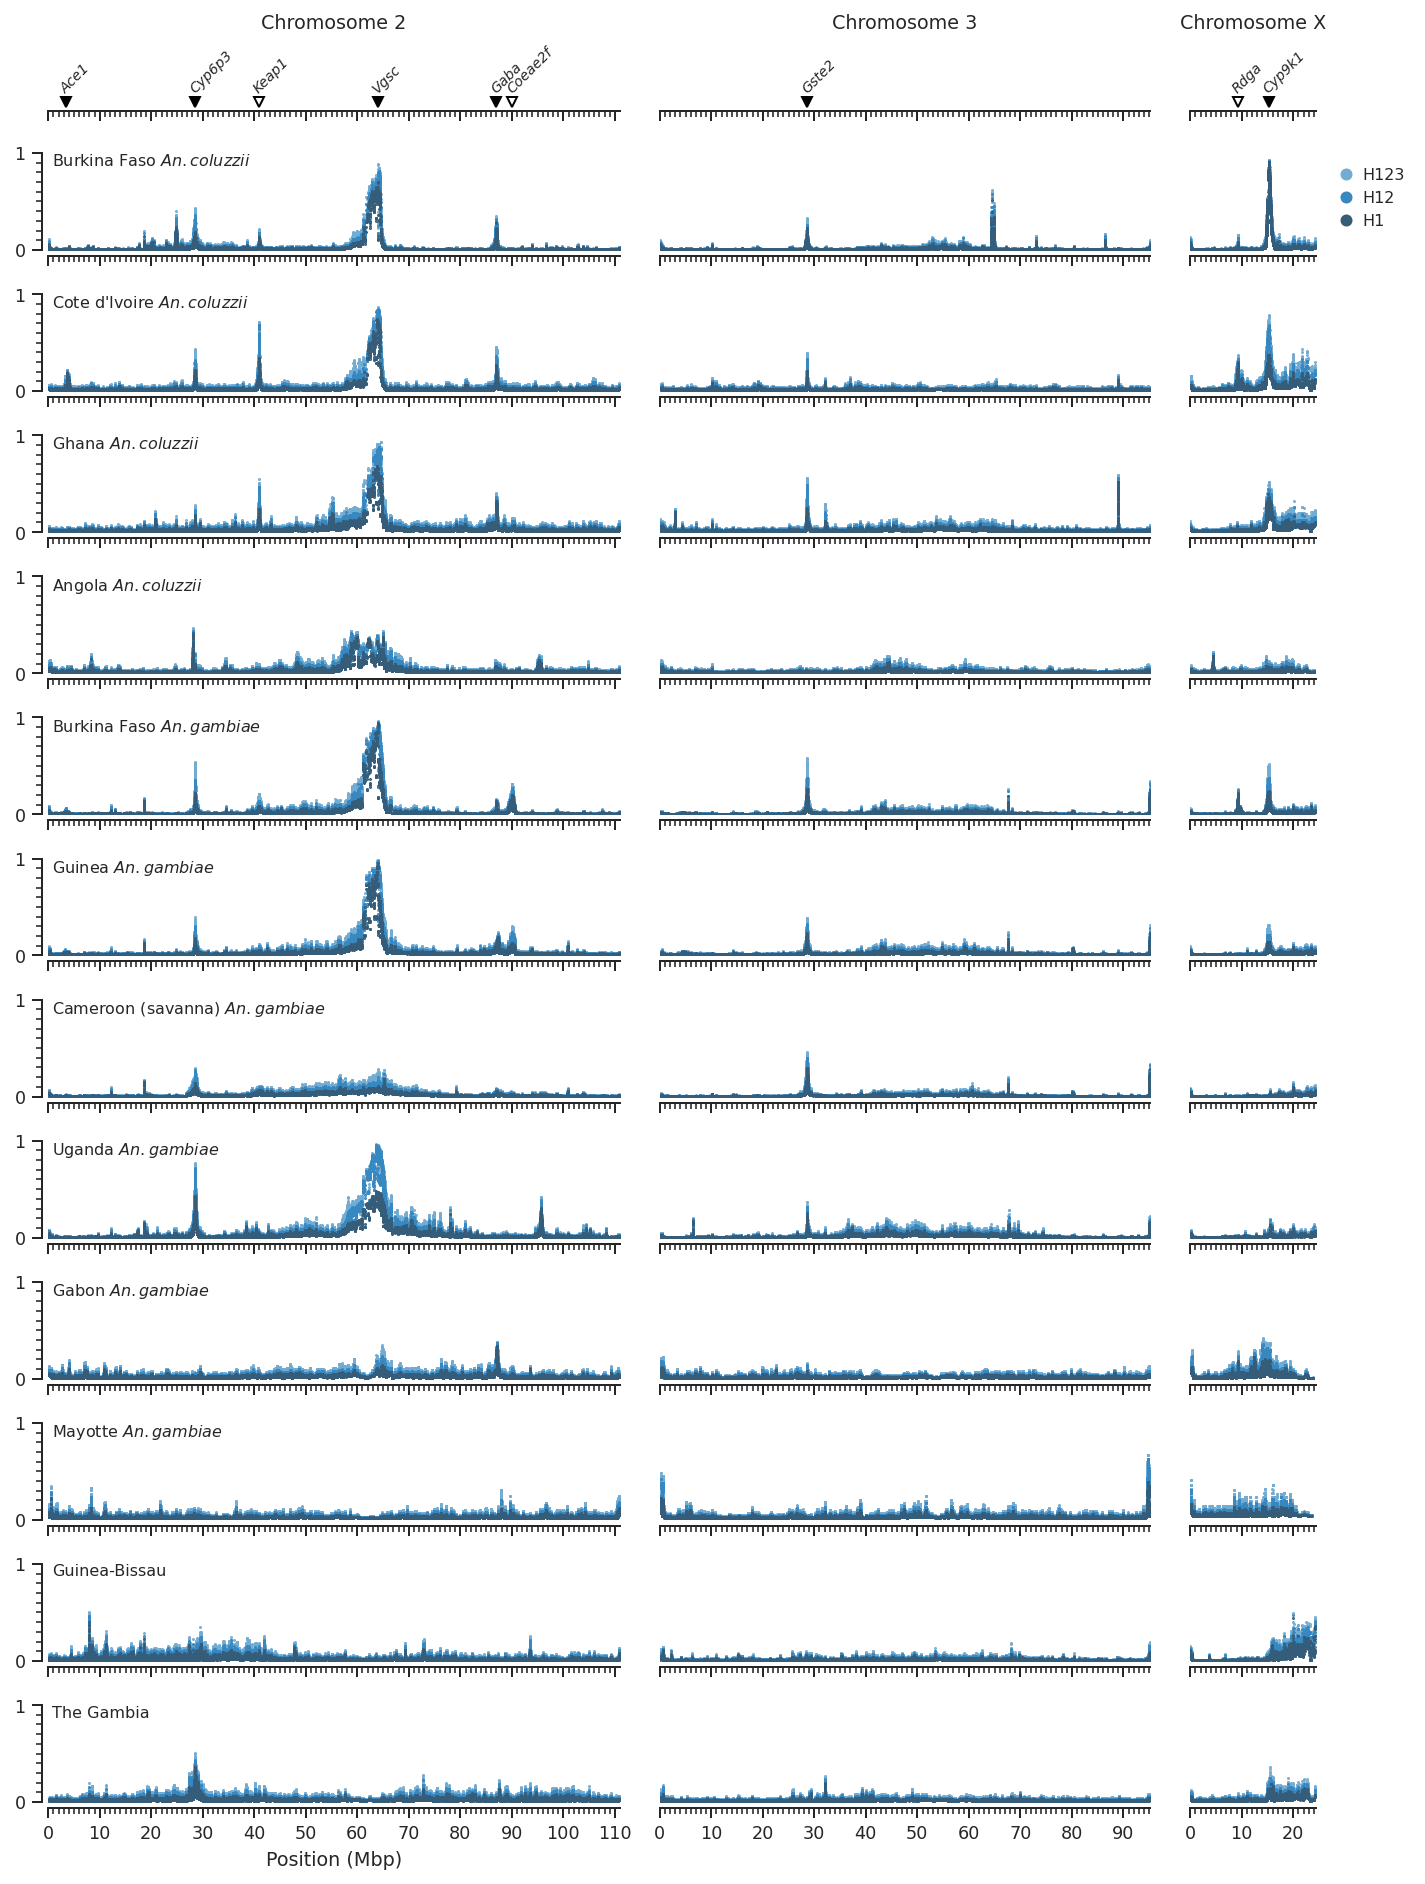

In [31]:
fig_h12(
    pops=[
        "bf_col",
        "ci_col",
        "gh_col",
        "ao_col",
        "bf_gam",
        "gn_gam",
        #         'gh_gam',  # small sample size
        "cm_sav_gam",
        "ug_gam",
        "ga_gam",
        #         'gq_gam',  # small sample size
        "fr_gam",
        "gw",
        "gm",
    ],
    filter_size=None,
    savefig=here() / 'artwork/fig_h12_nofilter.png',
    savefig_dpi=150,
)

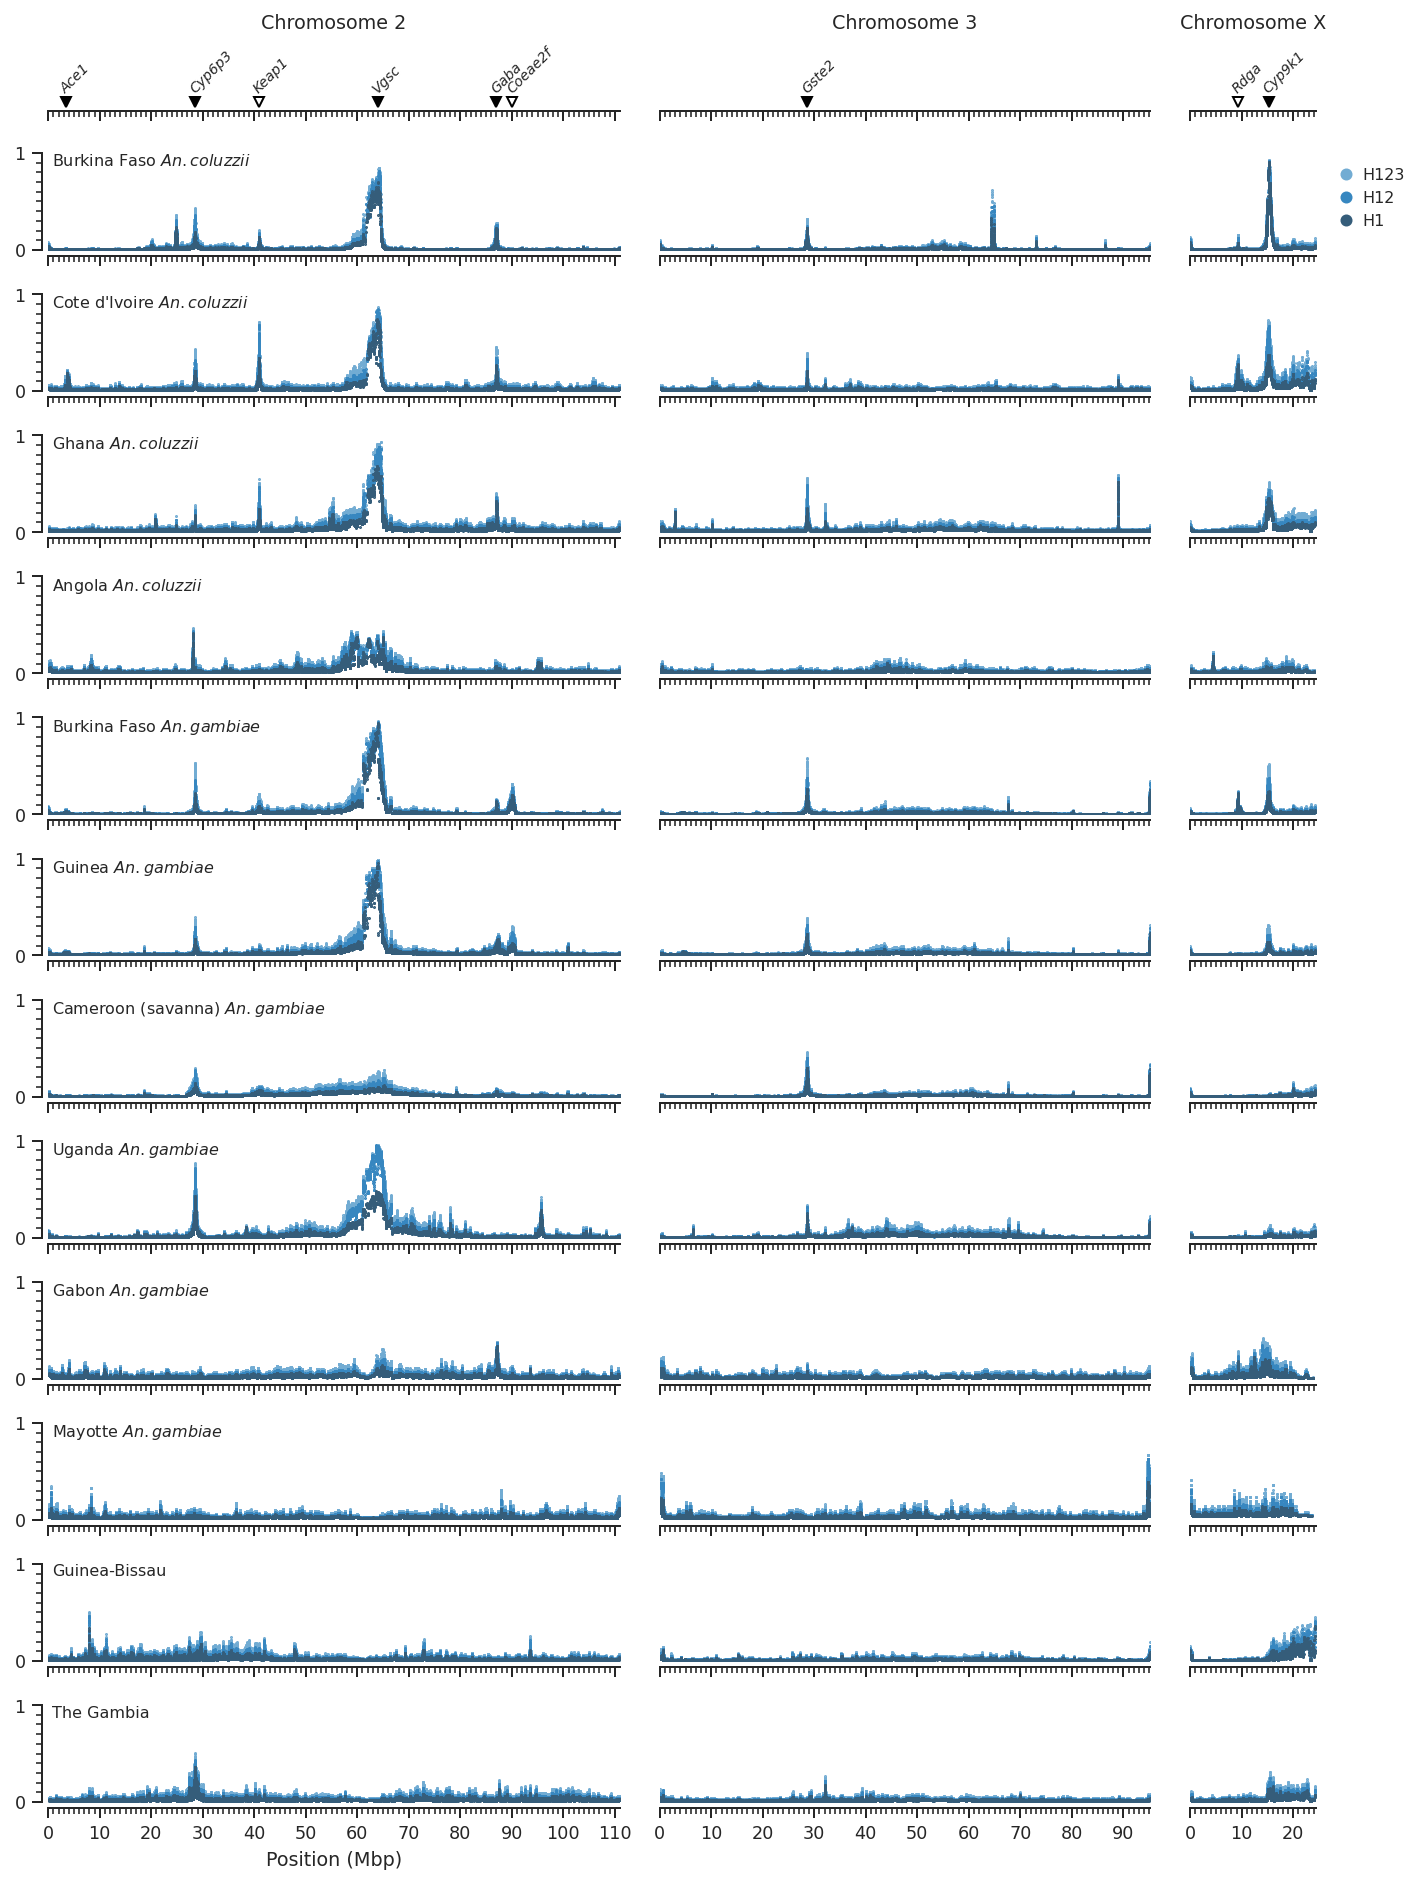

In [32]:
fig_h12(
    pops=[
        "bf_col",
        "ci_col",
        "gh_col",
        "ao_col",
        "bf_gam",
        "gn_gam",
        # 'gh_gam',  # small sample size
        "cm_sav_gam",
        "ug_gam",
        "ga_gam",
        # 'gq_gam',  # small sample size
        "fr_gam",
        "gw",
        "gm",
    ],
    filter_size=20,
    savefig=here() / 'artwork/fig_h12_filter.png',
    savefig_dpi=150,
)

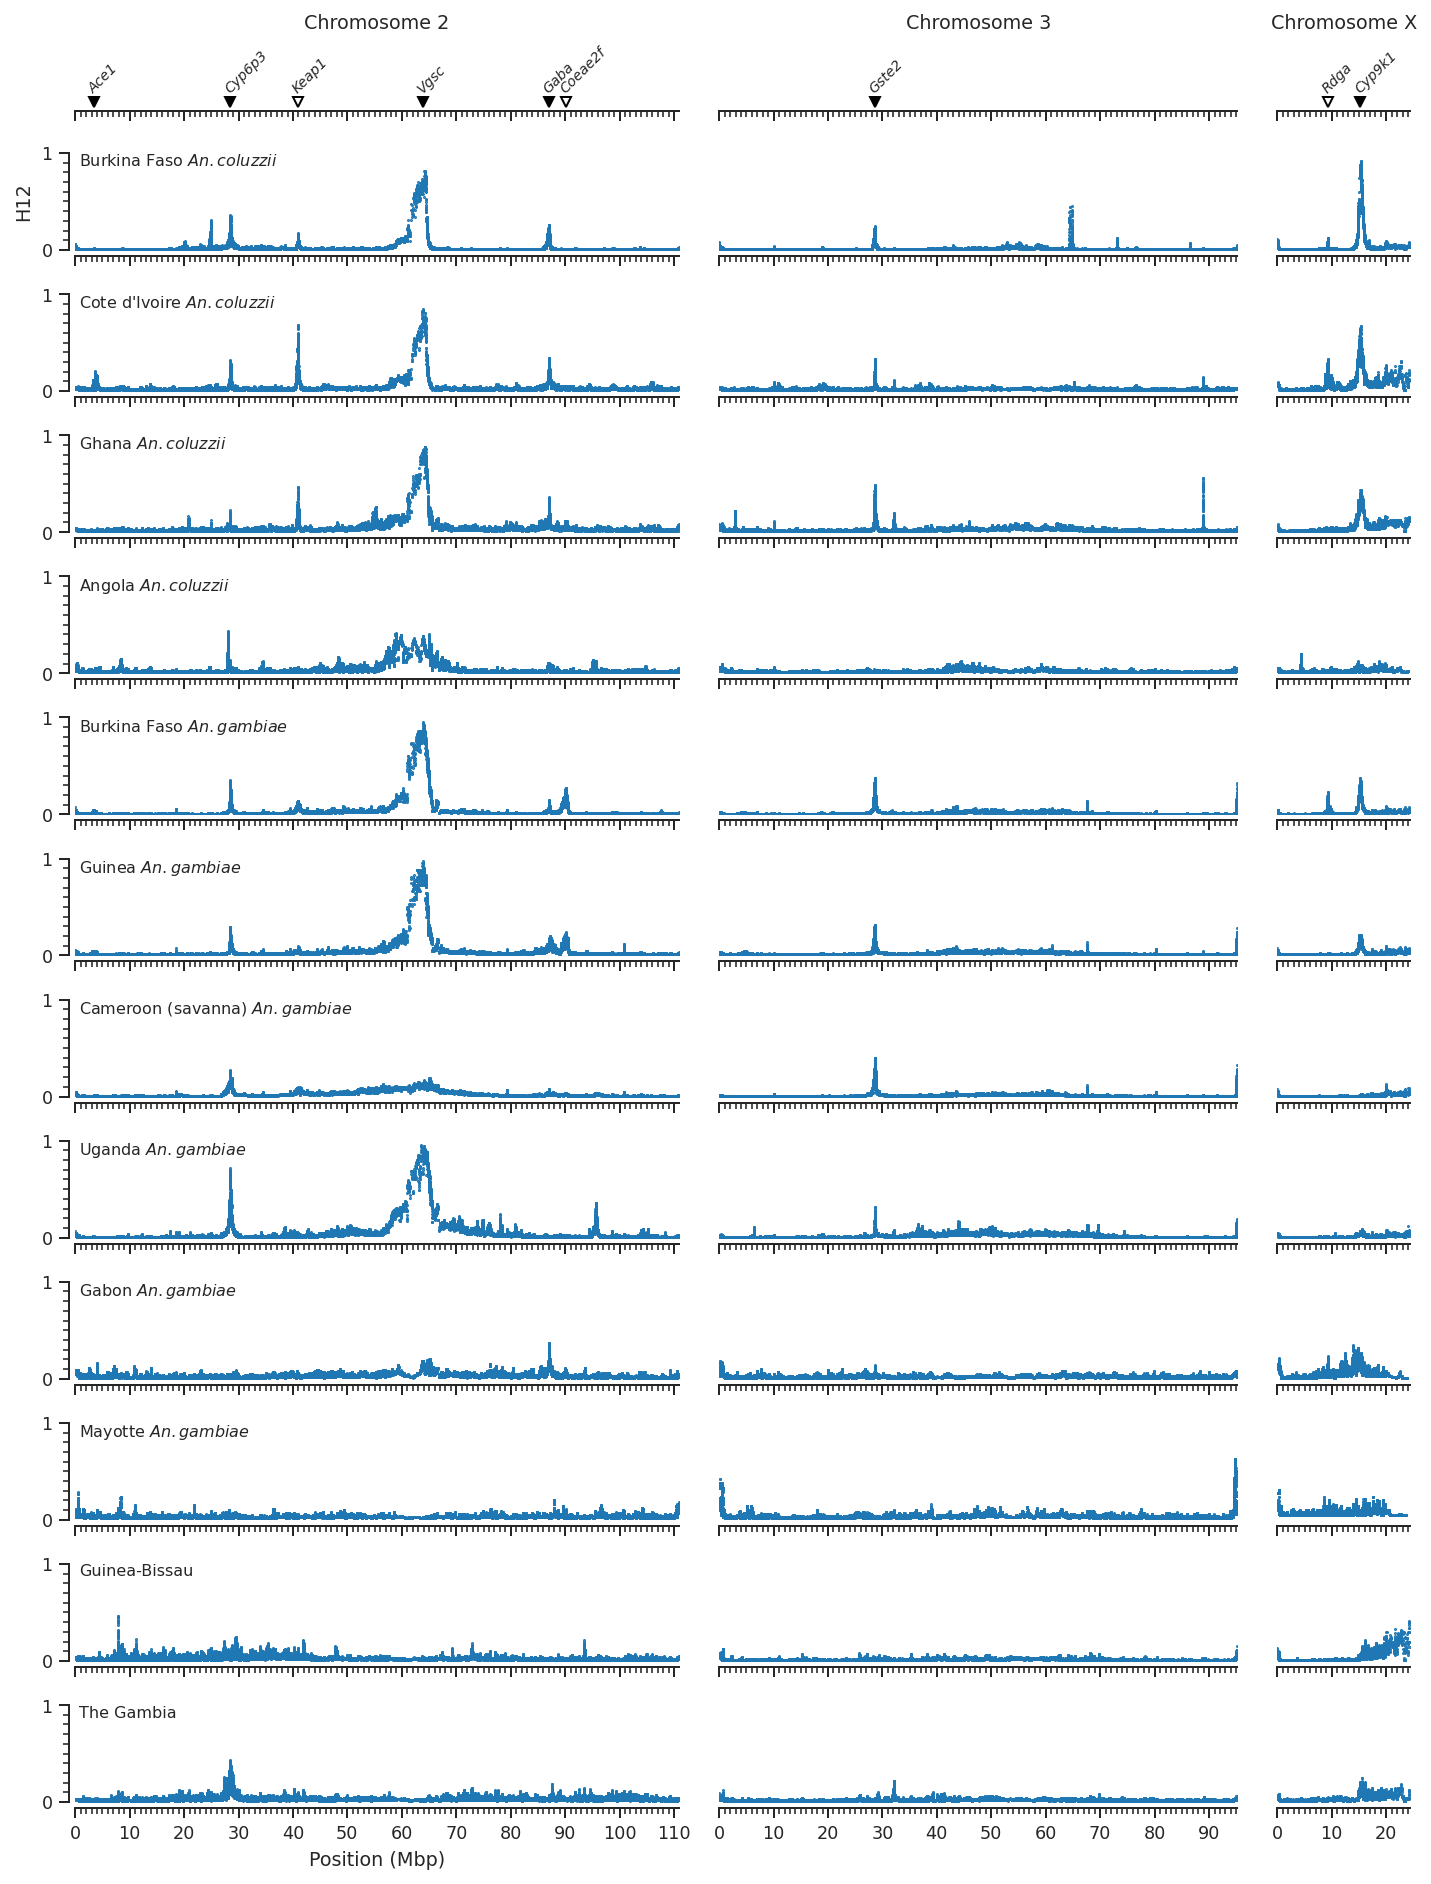

In [39]:
fig_h12(
    pops=[
        "bf_col",
        "ci_col",
        "gh_col",
        "ao_col",
        "bf_gam",
        "gn_gam",
        # 'gh_gam',  # small sample size
        "cm_sav_gam",
        "ug_gam",
        "ga_gam",
        # 'gq_gam',  # small sample size
        "fr_gam",
        "gw",
        "gm",
    ],
    stat='H12',
    filter_size=20,
    savefig=here() / 'artwork/fig_h12_filter_simple.png',
    savefig_dpi=150,
)

In [168]:
df_samples = pd.read_csv(
    here() / "data/external/ag1000g/phase2/AR1/samples/samples.meta.txt", sep="\t"
)

In [173]:
for pop in pop_defs:
    pop_query = (
        pop_defs[pop]["query"]
        .replace("region", "location")
        .replace("Gado-Badzere", "Gado Badzere")
        .replace("Zembe-Borongo", "Zembe Borongo")
    )
    print(pop, len(df_samples.query(pop_query)))

ao_col 78
bf_col 75
bf_gam 92
ci_col 71
cm_sav_gam 96
fr_gam 24
ga_gam 69
gh_col 55
gh_gam 12
gm 65
gn_gam 40
gq_gam 9
gw 91
ke 48
ug_gam 112
